- 整合：创建单一的流水线执行之前的所有转换!!
1. 大多数ML算法不期望缺失值, 数字特征中的缺失值将通过用中位数替换它们来估算。在分类特征中，缺失值将被最常见的类别替换。
2. 大多数ML算法只接受数字输入, 类别特征将被独热编码
3. 计算并添加一些比率特征：bedrooms_ratio、rooms_per_house和people_per_house。希望这些能更好地与房价中位数相关联
4. 添加集群相似性特征。可能比纬度和经度对模型更有用
5. 长尾特征被它们的对数取代，因为大多数模型更喜欢具有大致均匀分布或高斯分布的特征。
6. 大多数ML算法更喜欢所有特征具有大致相同的尺度, 所有数值特征都将被标准化

导入数据

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

housing = pd.read_csv(Path("datasets/housing/housing.csv"))

查看数据

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


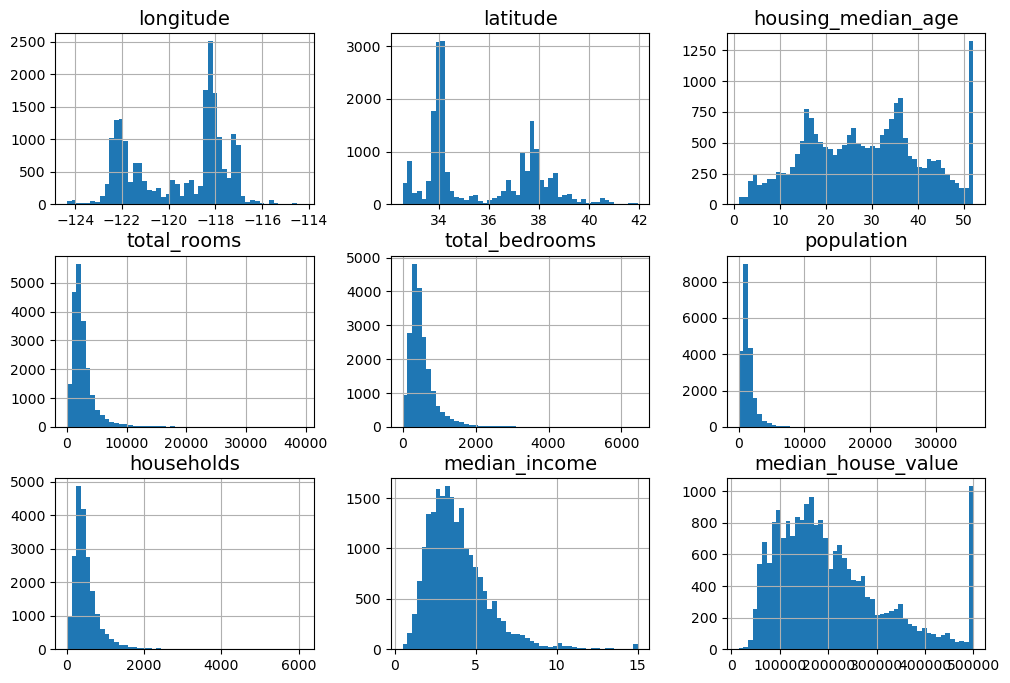

In [6]:
import matplotlib.pyplot as plt

# 定义默认字体大小
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

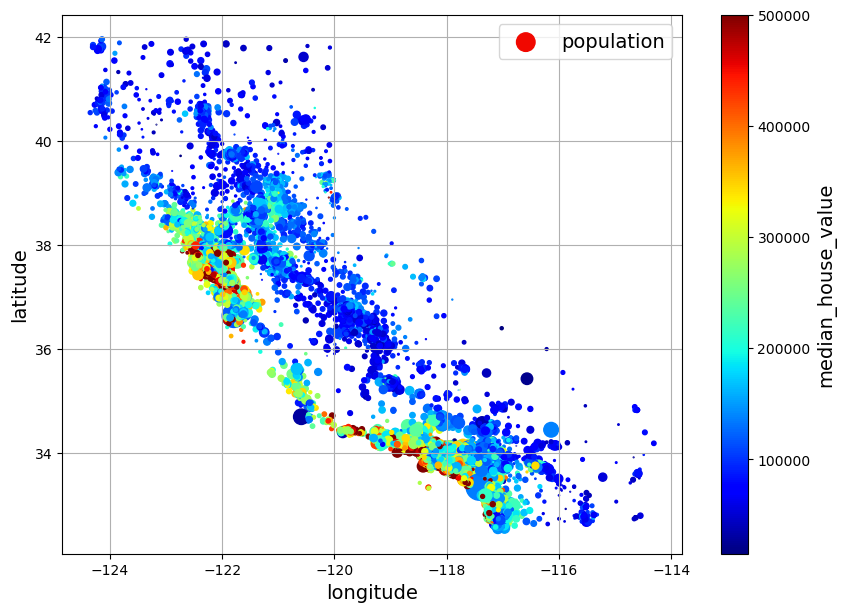

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [9]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [10]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

根据收入中位数分层，分离训练集和测试集

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [13]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
housing = strat_train_set.copy()

In [15]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

尝试创建一个自定义转换器，在其fit()方法中训练k近邻回归器(sklearn.neighbors.KNeighborsRegressor)，并在其transform()方法中输出模型的预测。然后将此功能添加到预处理流水线，使用纬度和经度作为此转换器的输入。这将在模型中添加一个与最近地区的房价中位数相对应的特征。

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer, make_column_selector


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # KMeans估计器相关参数：集群数量，随机种子，KMeans是一个随机算法，依赖随机性来定位集群
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)

        # sample_weight可指定样本的相对权重, 属于KMeans算法里的超参数，训练前指定。
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # 永远返回self

    def transform(self, X):
        # self.kmeans_.cluster_centers_ 集群中心的位置
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
# 不同列用不同的转换器流水线

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms_ratio", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline) # remainder，剩下的列用什么转换器，现在就剩下housing_median_age



In [35]:
# 运行18分钟
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svr", SVR(gamma = 'auto')),
])


param_grid = {
    'preprocessing__geo__n_clusters': [5, 8, 10],
    'svr__C': [0.1, 1, 10],
    'svr__kernel': ['linear', 'rbf'],

}

# grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
#                            scoring='neg_root_mean_squared_error')
# grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF87F33A00>)])),
                                       ('svr', SVR(gamma='auto'))]),
             param_grid={'preprocessing__geo__n_clusters': [5, 8, 10],
                         'svr__C': [0.1, 1, 10],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [36]:
# grid_search.best_params_

{'preprocessing__geo__n_clusters': 10, 'svr__C': 10, 'svr__kernel': 'linear'}

In [37]:
# cv_res = pd.DataFrame(grid_search.cv_results_)
# cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_svr__C,param_svr__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
16,13.441475,0.253030,5.487495,0.227249,10,10,linear,"{'preprocessing__geo__n_clusters': 10, 'svr__C...",-91969.676520,-94451.264465,-90760.060626,-92393.667204,1536.461849,1
10,10.263269,0.187488,4.165065,0.148223,8,10,linear,"{'preprocessing__geo__n_clusters': 8, 'svr__C'...",-92171.116780,-94645.471988,-91063.831988,-92626.806919,1497.281180,2
4,10.202706,0.043996,4.169198,0.053373,5,10,linear,"{'preprocessing__geo__n_clusters': 5, 'svr__C'...",-92373.655108,-94778.260280,-91275.490895,-92809.135428,1462.778332,3
14,11.115264,0.164322,4.520709,0.099532,10,1,linear,"{'preprocessing__geo__n_clusters': 10, 'svr__C...",-114120.661979,-111989.667861,-112346.241767,-112818.857202,931.954217,4
8,13.237004,0.769432,5.173122,0.208907,8,1,linear,"{'preprocessing__geo__n_clusters': 8, 'svr__C'...",-114116.828349,-112026.537756,-112396.647750,-112846.671285,910.757772,5


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ('feature_selection', SelectFromModel(LinearRegression())),
    ('regression', DecisionTreeRegressor(random_state=42)),
])

full_pipeline.fit(housing, housing_labels)
housing_predictions = full_pipeline.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

12513.56752227362

In [17]:
# 运行10分钟

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

class NearestLabel(BaseEstimator, TransformerMixin):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):  # 即使不用y，也需要它
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()

        X = check_array(X)  # 检查X是不是数组
        self.n_features_in_ = X.shape[1]  # 所有估计器会把输入特征的数量存下来
        self.knn_ = KNeighborsRegressor(n_neighbors=self.n_neighbors)
        self.knn_.fit(X, y)
        return self  # 永远返回 self!

    def transform(self, X):
        check_is_fitted(self)  # 检查是否适配过数据 （检查是否有那些下划线结尾的参数)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]

        return self.knn_.predict(X).reshape(-1, 1)

    def get_feature_names_out(self, names=None):
        return ["Nearest Neighbors Median Housing Price"]

knn_transformer = NearestLabel()
preprocessing_knn = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", knn_transformer, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

full_pipeline_knn = Pipeline([
    ("preprocessing_knn", preprocessing_knn),
    ("random_forest", RandomForestRegressor(random_state=42)),
])


param_distribs = {'preprocessing_knn__geo__n_neighbors': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline_knn, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)  # 3折交叉验证，10组超参数探索

rnd_search.fit(housing, housing_labels)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing_knn',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_na...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing_knn__geo__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018289B6C970>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018289B6C8E0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [83]:
rnd_search.best_params_

{'preprocessing_knn__geo__n_neighbors': 13, 'random_forest__max_features': 5}

In [84]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing_knn__geo__n_neighbors,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,13.823352,0.356825,0.140291,0.007020,13,5,"{'preprocessing_knn__geo__n_neighbors': 13, 'r...",-42740.993235,-44006.402478,-45314.218426,-44020.538046,1050.562336,1
2,20.212771,0.087584,0.134642,0.000788,23,8,"{'preprocessing_knn__geo__n_neighbors': 23, 'r...",-43459.887212,-44556.878437,-45927.106899,-44647.957516,1009.295066,2
3,32.263675,1.854909,0.143632,0.011302,21,12,"{'preprocessing_knn__geo__n_neighbors': 21, 'r...",-43486.697026,-44761.265198,-45963.789871,-44737.250698,1011.411477,3
8,17.666094,0.030183,0.140270,0.000933,32,7,"{'preprocessing_knn__geo__n_neighbors': 32, 'r...",-43741.339206,-45277.570112,-45958.704949,-44992.538089,927.401442,4
7,33.391690,1.121666,0.148249,0.015081,26,13,"{'preprocessing_knn__geo__n_neighbors': 26, 'r...",-43866.058367,-44976.450692,-46396.516469,-45079.675176,1035.630572,5


In [85]:

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # 没有 *args, **kwargs, sklearn的规范
        self.with_mean = with_mean

    def fit(self, X, y=None):  # 即使不用y，也需要它
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()

        X = check_array(X)  # 检查X是不是数组
        self.mean_ = X.mean(axis=0) if self.with_mean else None
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]# 所有估计器会把输入特征的数量存下来
        if np.any(self.scale_ == 0):
            raise ValueError("一些特征的方差为零，无法进行缩放")
        return self  # 永远返回 self!

    def transform(self, X):
        check_is_fitted(self)  # 检查是否适配过数据 （检查是否有那些下划线结尾的参数)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1], "特征数量不一致"
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

    def inverse_transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1], "特征数量不一致"

        if self.with_mean:
            X = X + self.mean_
        return X * self.scale_

    def get_feature_names_out(self, input_features=None):
        check_is_fitted(self)
        if input_features is None:
            return self.feature_names_in_
        else:
            return input_features

In [18]:
final_model = rnd_search.best_estimator_

In [21]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

44263.053030986506

In [23]:
import joblib
joblib.dump(final_model, "./models/my_california_housing_model.pkl")

['./models/my_california_housing_model.pkl']